# Multiclass Image Classifiation with ANN

Multiclass image classification is a type of machine learning problem where the goal is to classify an image into one of several possible classes. For example, given an image of a fruit, the task might be to classify the fruit as an apple, banana, or orange.

# Importing The Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import tensorflow as tf

In [3]:
from tensorflow.keras.datasets import fashion_mnist

In [4]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 4s 1us/step


In [5]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [6]:
y_train.shape, y_test.shape

((60000,), (10000,))

In [7]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [8]:
np.max(x_train)

255

In [10]:
np.min(x_train), np.mean(x_train)

(0, 72.94035223214286)

In [11]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [12]:
np.max(y_train), np.min(y_train)

(9, 0)

In [14]:
class_names = ['0 Top]T-shirt', '1 Trouser', '2 Pullover', '3 Dress', '4 Coat', '5 Sandal', '6 Shirt', '7 Sneaker', '8 Bag', '9 Ankle boot']
print(class_names)

['0 Top]T-shirt', '1 Trouser', '2 Pullover', '3 Dress', '4 Coat', '5 Sandal', '6 Shirt', '7 Sneaker', '8 Bag', '9 Ankle boot']


# Data Exploration

Data exploration is the process of getting to know the data you are working with in a machine learning project. It involves performing various types of analyses and visualizations to gain insights into the structure, quality, and characteristics of the data. The goal of data exploration is to identify any issues or patterns in the data that may need to be addressed before building a machine learning model.

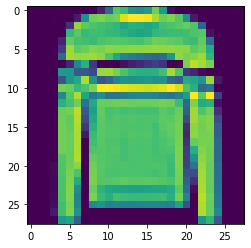

In [16]:
plt.figure()
plt.imshow(x_train[5])

# Normalizing The Data

Normalizing the data refers to the process of scaling the input data so that all features have a similar scale and distribution. This is often done as a preprocessing step before feeding the data into a machine learning model.

Normalization is important because features that are on different scales can have a disproportionate impact on the model's training process and can make it difficult for the model to learn meaningful patterns and relationships. For example, if one feature has values ranging from 0 to 100, and another feature has values ranging from 0 to 0.1, the second feature will have much less impact on the model's training process.

In [17]:
x_train = x_train / 255.0
x_test = x_test / 255.0

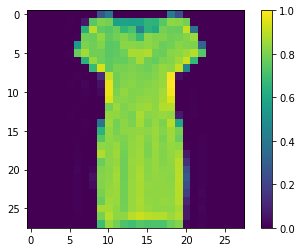

In [18]:
plt.figure()
plt.imshow(x_train[20])
plt.colorbar()

# Flattening The DataSet

Flattening the data refers to the process of converting multi-dimensional data (such as images or tensors) into a one-dimensional array or vector. This is often done as a preprocessing step before feeding the data into a machine learning model.

By flattening the input data, we can more easily process it in a neural network and extract meaningful patterns and relationships.

In [19]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [20]:
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

In [21]:
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

# Building The Model

In [22]:
model = tf.keras.models.Sequential()

In [24]:
model.add(tf.keras.layers.Dense(units = 128, activation = 'relu', input_shape = (784, )))

In [25]:
model.add(tf.keras.layers.Dropout(0.3))

In [26]:
model.add(tf.keras.layers.Dense(units = 10, activation = 'softmax'))

# Training The Model

To train a machine learning model, we need to define the model architecture and compile it with an optimizer, a loss function, and one or more evaluation metrics. We also need to prepare the training data by preprocessing it and splitting it into batches.

In [28]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = 'sparse_categorical_accuracy')

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.fit(x_train, y_train, epochs = 10)


Epoch 1/10
1875/1875 [==============================] - 32s 14ms/step - loss: 0.5557 - sparse_categorical_accuracy: 0.8041
Epoch 2/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.4198 - sparse_categorical_accuracy: 0.8480
Epoch 3/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.3856 - sparse_categorical_accuracy: 0.8600
Epoch 4/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3654 - sparse_categorical_accuracy: 0.8666
Epoch 5/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3509 - sparse_categorical_accuracy: 0.8710
Epoch 6/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3396 - sparse_categorical_accuracy: 0.8757
Epoch 7/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.3300 - sparse_categorical_accuracy: 0.8758
Epoch 8/10
1875/1875 [==============================] - 23s 13ms/step - loss: 0.3195 - sparse_categorical_accuracy: 0.8814
Epoch 9/10
1875/

In [31]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.3409 - sparse_categorical_accuracy: 0.8802


In [32]:
print('Accuracy: .{}'.format(test_accuracy))

Accuracy: .0.8802000284194946


In [36]:
y_pred_prob = model.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)

313/313 [==============================] - 2s 5ms/step


In [37]:
print(y_pred)

[9 2 1 ... 8 1 5]


In [38]:
y_pred[100], y_test[100] #predicted and actual output

(3, 3)

In [39]:
print(class_names)

['0 Top]T-shirt', '1 Trouser', '2 Pullover', '3 Dress', '4 Coat', '5 Sandal', '6 Shirt', '7 Sneaker', '8 Bag', '9 Ankle boot']


In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score

A confusion matrix is a table that is often used to evaluate the performance of a classification model. It shows the number of true positives, true negatives, false positives, and false negatives for each class in the predicted versus actual classification.

In [42]:
confusion_matrix = confusion_matrix(y_pred, y_test)

In [43]:
confusion_matrix

array([[849,   3,  16,  34,   0,   0, 131,   0,   4,   0],
       [  0, 963,   0,   5,   0,   0,   1,   0,   0,   0],
       [ 12,   1, 789,   8,  83,   0, 100,   0,   2,   0],
       [ 19,  25,   6, 871,  16,   0,  26,   0,   6,   0],
       [  6,   5, 133,  56, 861,   0, 106,   0,   5,   0],
       [  1,   0,   0,   0,   0, 967,   0,  18,   3,  11],
       [104,   1,  54,  24,  36,   0, 623,   0,   3,   1],
       [  0,   0,   0,   0,   0,  20,   0, 959,   3,  42],
       [  9,   2,   2,   2,   4,   1,  13,   0, 974,   0],
       [  0,   0,   0,   0,   0,  12,   0,  23,   0, 946]], dtype=int64)

In [44]:
confusion_matrix_accuracy = accuracy_score(y_test, y_pred)

In [45]:
confusion_matrix_accuracy

0.8802